In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
load_data_old = pd.read_csv('loan_data.csv')
loan_data = load_data_old.copy()

pd.options.display.max_columns = None
loan_data.head()

/Users/plutosirius/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
### drop the features that are highly correlated with the target variable 
### these features may significantly boost the accuracy of our model than it should be
### some of these columns contain data that will not be created until loan is accepted
### we will also drop the features not meaningful to prediction (e.g.: demographic info) and duplicated features (e.g.: title)
# hardship related? settlement plan related?
cols_to_drop = ['Unnamed: 0', 'id', 'member_id', 'addr_state', 'funded_amnt', 'funded_amnt_inv', 'grade',
               'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'policy_code',
               'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'issue_d', 'recoveries', 'collection_recovery_fee']

### drop the features that represent joint/family information
joint_info = ['annual_inc_joint', 'dti_joint', 'verification_status_joint']
loan_data = loan_data.drop(cols_to_drop, axis=1)
loan_data = loan_data.drop(joint_info, axis=1)

In [4]:
### transform our target variable (loan status) to binary, while only keeping fully paid (1) and charged off (0)
loan_data = loan_data.loc[(loan_data.loan_status == 'Fully Paid') | (loan_data.loan_status == 'Charged Off')]
loan_data.loan_status[loan_data.loan_status=='Fully Paid'] = 1
loan_data.loan_status[loan_data.loan_status=='Charged Off'] = 0
loan_data['loan_status'] = pd.to_numeric(loan_data['loan_status'])

/Users/plutosirius/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


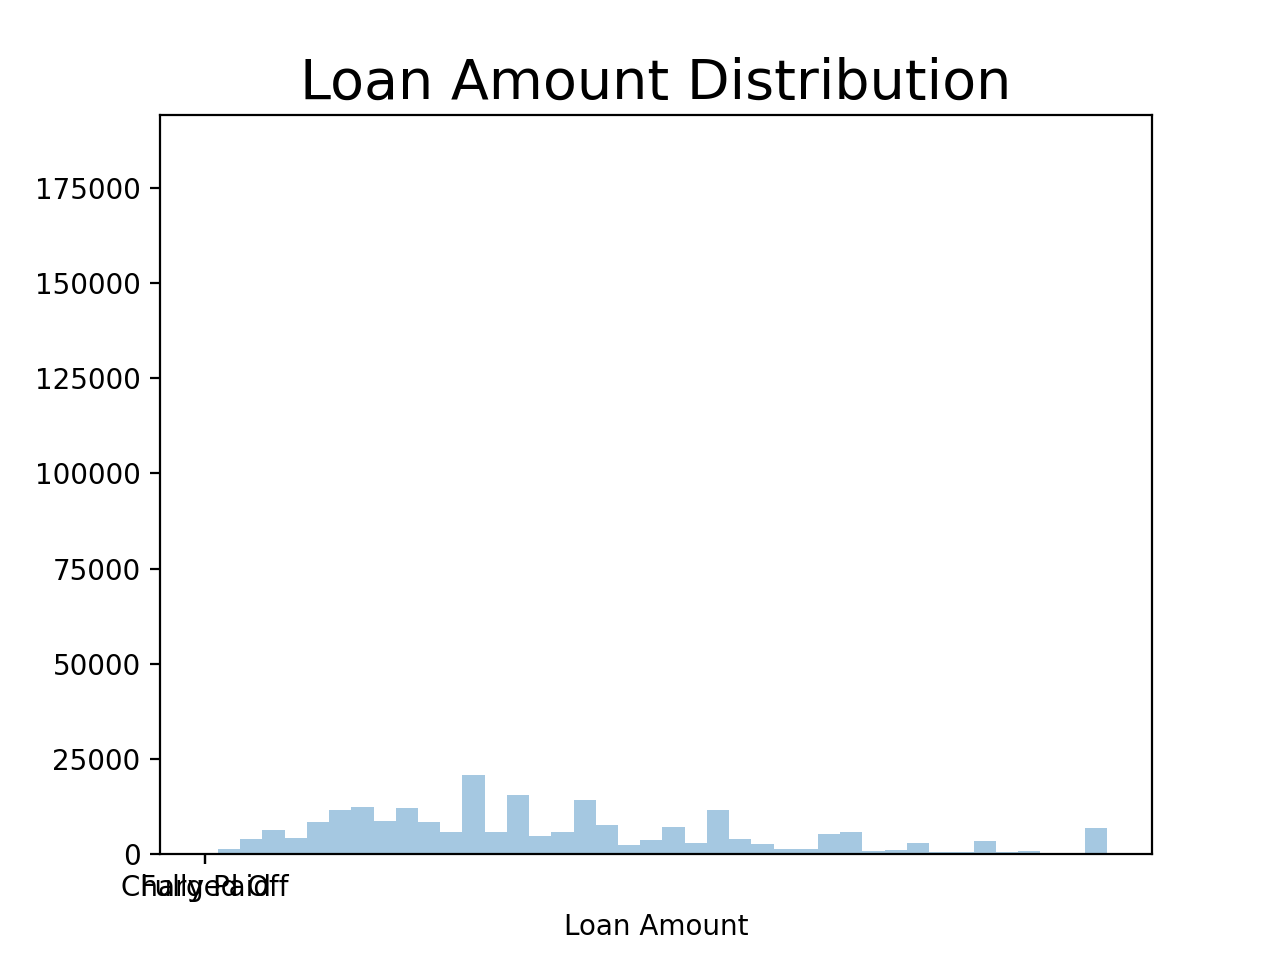

[Text(0, 0, 'Charged Off'), Text(0, 0, 'Fully Paid')]

In [5]:
import seaborn as sns
ax = sns.countplot(x='loan_status', data=loan_data)
ax.set_xticklabels(['Charged Off', 'Fully Paid'])

In [6]:
ax2 = sns.distplot(loan_data['loan_amnt'], kde=False, bins=40)
ax2.set(xlabel='Loan Amount', ylabel='')
ax2.set_title('Loan Amount Distribution', size=20)

Text(0.5, 1.0, 'Loan Amount Distribution')

In [7]:
##### preprocess continuous variables --> turn them to valid int/float #####
### term
loan_data['term_int'] = loan_data['term'].str.replace('\ months', '')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [8]:
### emp_length
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('nan', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [9]:
### earliest_cr_line
loan_data['earliest_cr_line_datetime'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')
loan_data.loc[loan_data['earliest_cr_line_datetime'].dt.year >= 2021, 'earliest_cr_line_datetime'] -= pd.DateOffset(years=100)

# create a new variable representing the time difference between the datetime and an arbitrary date (Jan, 2016)
loan_data['earliest_cr_line_diff'] = round(pd.to_numeric((pd.to_datetime('2016-01') - loan_data['earliest_cr_line_datetime']) / np.timedelta64(1, 'M')))

<IPython.core.display.Javascript object>


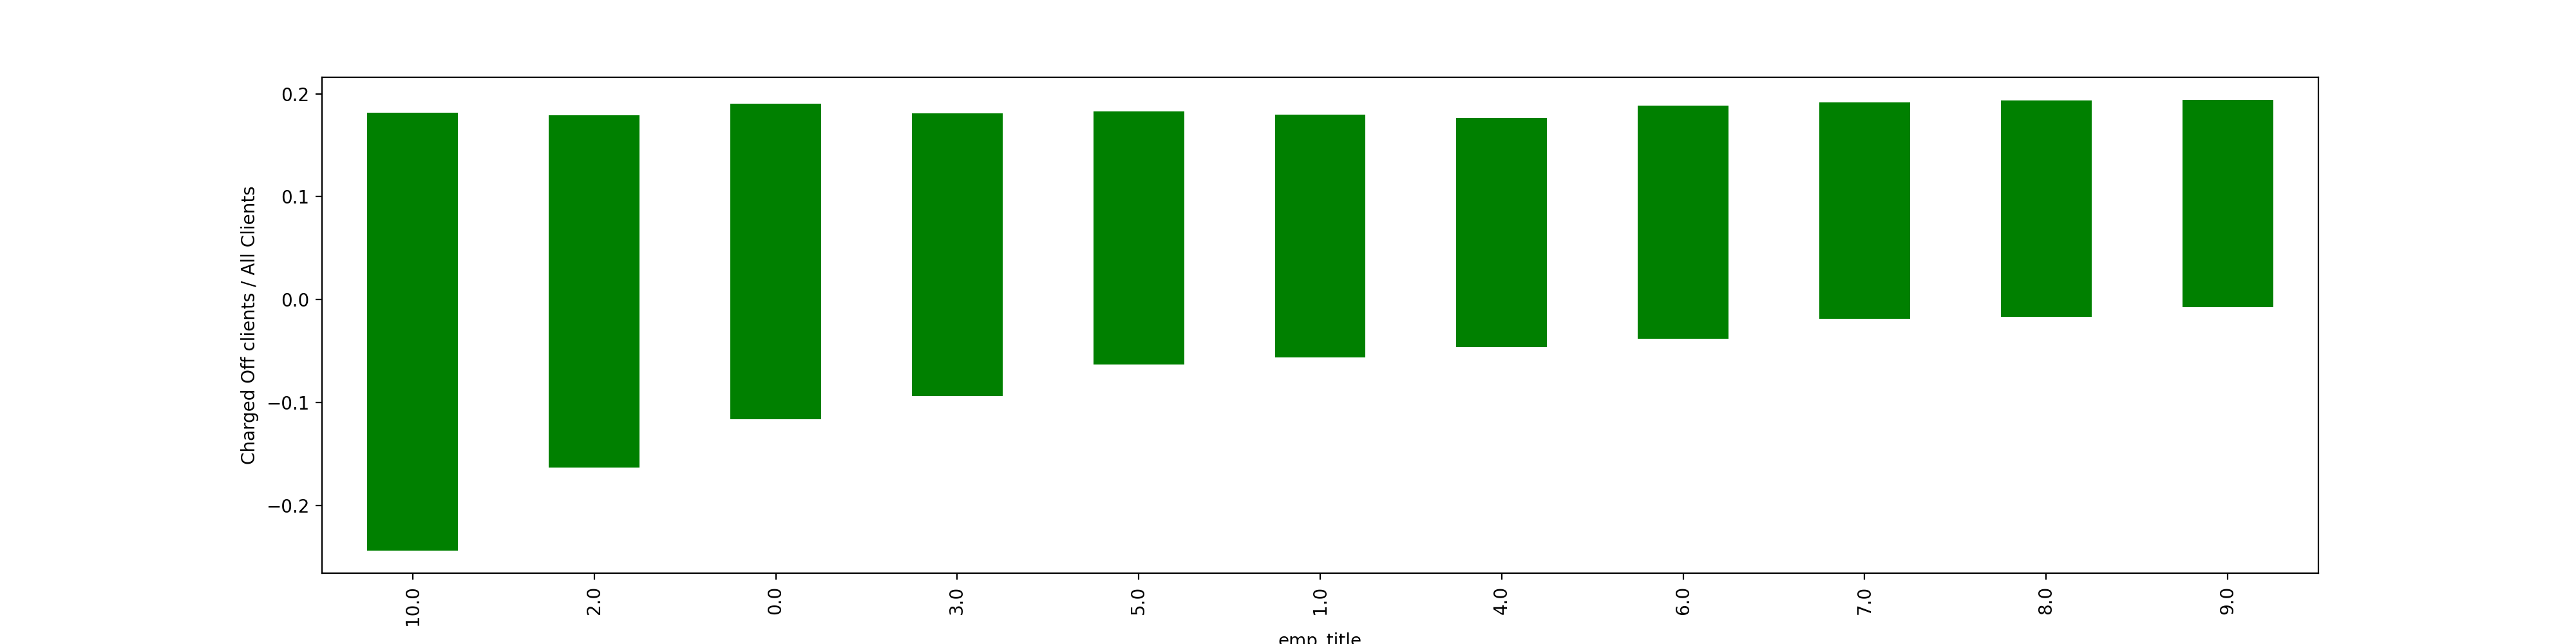

In [10]:
#### explore the correlation between features and the target variable (loan_status)
plt.figure(figsize=(20,5))
loan_data.corr()['loan_status'].sort_values(ascending=True).drop('loan_status').plot.bar(color='green')

In [11]:
# we will remove emp_length_int since it the proportion of charged off is approximately the same across different groups of emp_length
tmp = loan_data[loan_data['loan_status'] == 0]['emp_length_int'].value_counts() / loan_data['emp_length_int'].value_counts()
ax3 = tmp.plot.bar(color='green')
ax3.set(xlabel='emp_title', ylabel='Charged Off clients / All Clients')

[Text(0, 0.5, 'Charged Off clients / All Clients'), Text(0.5, 0, 'emp_title')]

In [12]:
##### preprocess categorical variables --> create dummy variables for all categories #####
loan_data_dummies = [
                  pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                  pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                  pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':'),
                  pd.get_dummies(loan_data['application_type'], prefix='application_type', prefix_sep=':'),
                  pd.get_dummies(loan_data['sub_grade'], prefix='sub_grade', prefix_sep=':'),
                  pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),
                    ]

In [13]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

In [14]:
### we will drop the unused variables first before we move on
loan_data_dropped = loan_data.drop(['term', 'emp_length', 'emp_length_int', 'purpose','home_ownership', 'verification_status',
                                    'earliest_cr_line', 'earliest_cr_line_datetime', 'application_type', 'sub_grade', 'initial_list_status'], axis=1)

In [15]:
pd.options.display.max_rows = 120
loan_data_dropped.isnull().sum()

loan_amnt                                   0
int_rate                                    0
installment                                 0
annual_inc                                  0
loan_status                                 0
dti                                         0
delinq_2yrs                                 0
inq_last_6mths                              0
mths_since_last_delinq                 128059
mths_since_last_record                 200569
open_acc                                    0
pub_rec                                     0
revol_bal                                   0
revol_util                                186
total_acc                                   0
collections_12_mths_ex_med                 56
mths_since_last_major_derog            187196
acc_now_delinq                              0
tot_coll_amt                            63708
tot_cur_bal                             63708
open_acc_6m                            227214
open_il_6m                        

<IPython.core.display.Javascript object>


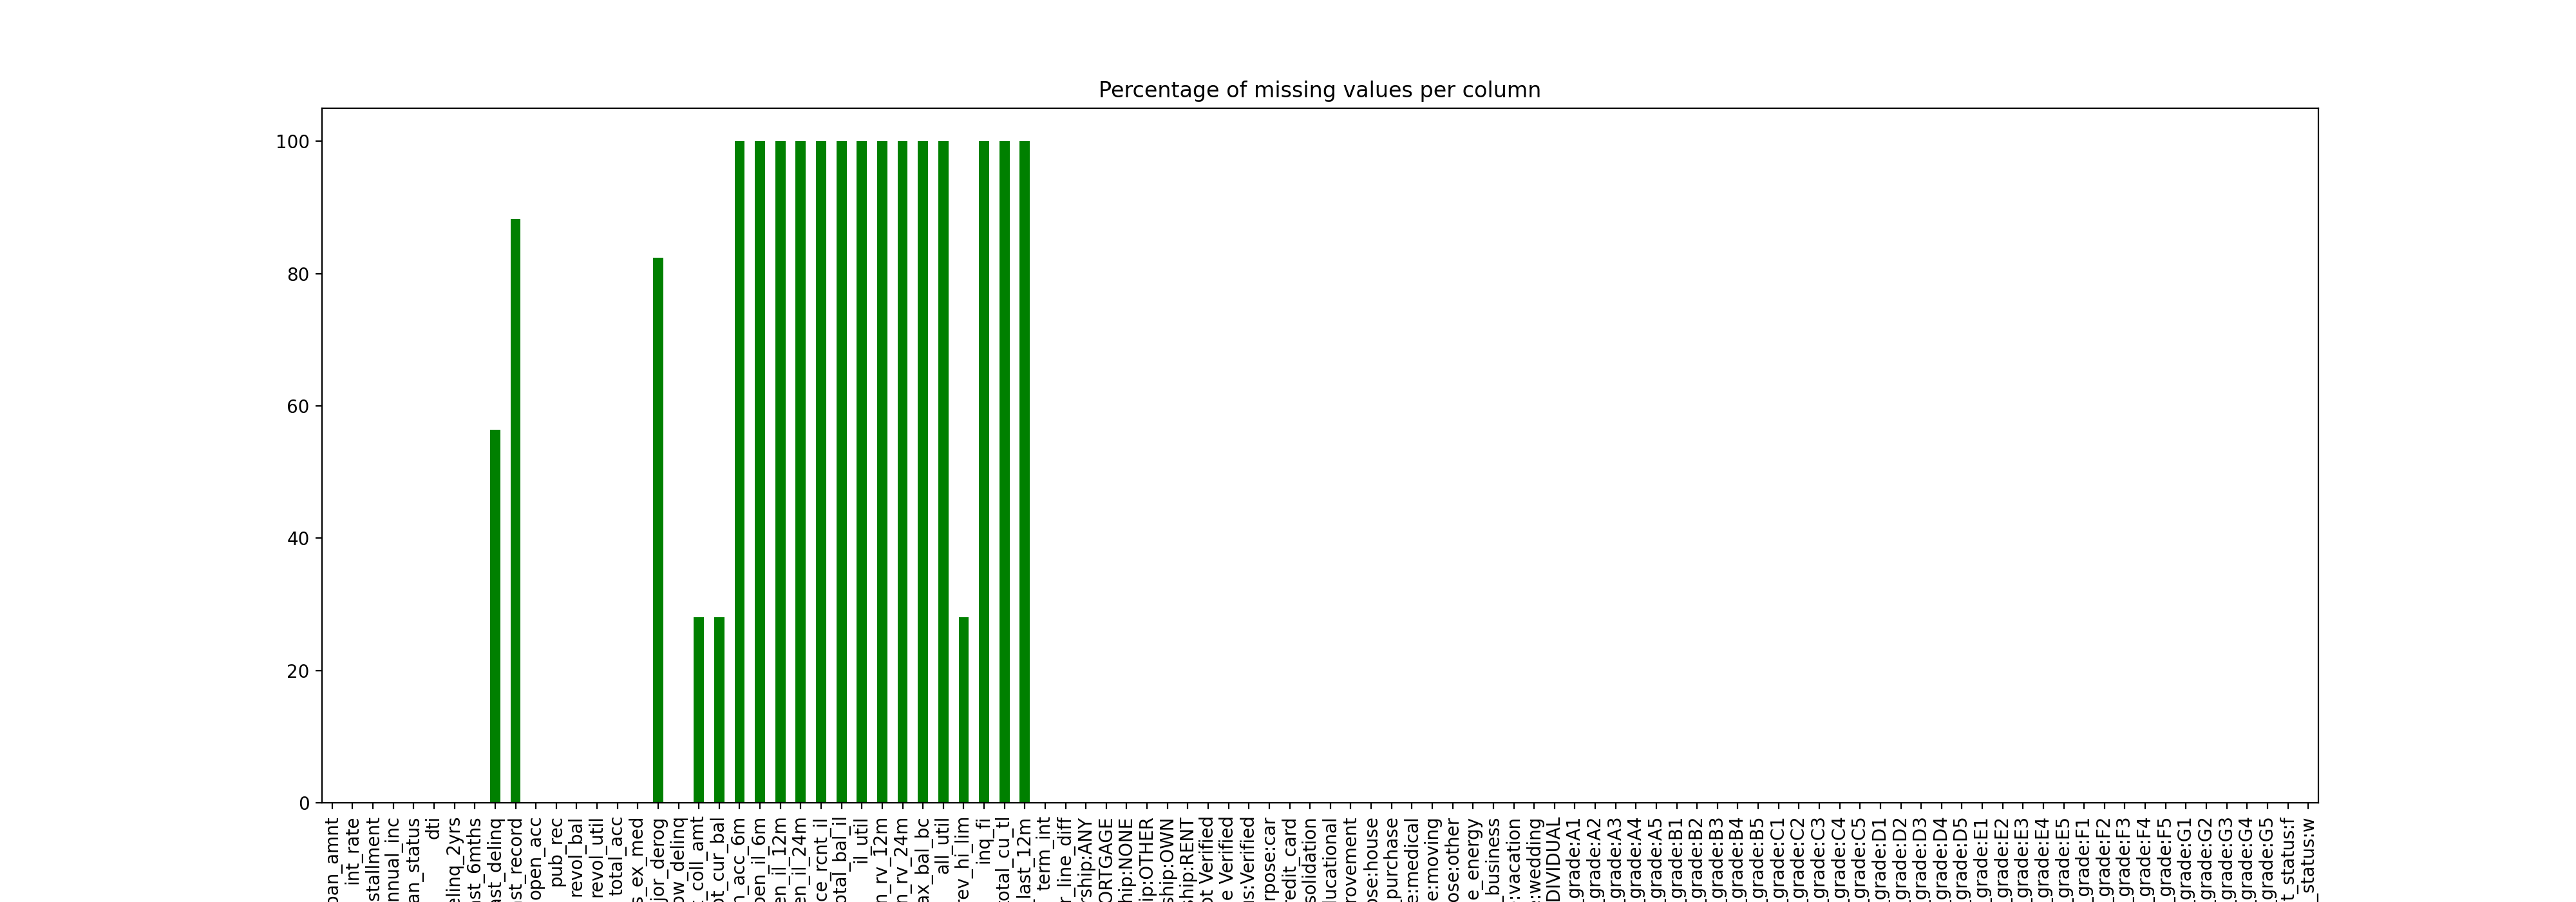

In [16]:
plt.figure(figsize=(20,7))
((loan_data_dropped.isnull().sum())/len(loan_data_dropped)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [17]:
# drop the features that have high number of missing values (> 5% of the dataset), thus not meaningful in our analysis
loan_data_preprocessed = loan_data_dropped.drop(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog','tot_coll_amt',
                                    'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
                                    'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                                    'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'total_rev_hi_lim'], axis=1)

In [18]:
# for the rest of features that have relatively low number of null values, we will just remove the rows with null values
loan_data_preprocessed = loan_data_preprocessed[pd.notnull(loan_data_preprocessed['revol_util'])]
loan_data_preprocessed = loan_data_preprocessed[pd.notnull(loan_data_preprocessed['collections_12_mths_ex_med'])]

In [19]:
#### feature selection
### we will remove highly correlated features
corr = loan_data_preprocessed.corr().abs()
pd.options.display.max_rows = 100
print(corr['loan_status'].sort_values(ascending=False).head(100))
print('---------------------------------------------------------')

cols = loan_data_preprocessed.columns
au_corr = corr.abs().unstack()
high_correlation = set()
for i in range(corr.shape[0]-1):
    for j in range(0, i+1):
        if abs(au_corr[(cols[i], cols[j])]) >= 0.8 and i != j:
            high_correlation.add((cols[i], cols[j]))
print(high_correlation)

loan_status                            1.000000
int_rate                               0.243898
term_int                               0.163017
dti                                    0.116105
revol_util                             0.093900
verification_status:Not Verified       0.074994
sub_grade:A4                           0.063339
loan_amnt                              0.063321
annual_inc                             0.063165
sub_grade:A1                           0.062045
sub_grade:A5                           0.057748
sub_grade:A3                           0.057577
sub_grade:A2                           0.057533
verification_status:Verified           0.057101
inq_last_6mths                         0.056239
sub_grade:E2                           0.055215
sub_grade:E5                           0.053637
sub_grade:E4                           0.053161
home_ownership:MORTGAGE                0.048413
sub_grade:B1                           0.047953
sub_grade:E3                           0

In [20]:
removed_features = ['installment', 'home_ownership:RENT']
loan_data_preprocessed = loan_data_preprocessed.drop(removed_features, axis=1)

In [21]:
loan_data_preprocessed['loan_status'].value_counts()

1    184550
0     42422
Name: loan_status, dtype: int64

In [22]:
# seperate the label from the features, loan status is our target variable
label = loan_data_preprocessed['loan_status']
y = pd.DataFrame(data={'label': label})
X = loan_data_preprocessed.drop(['loan_status'], axis=1)
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

# split the dataset into train and test
from sklearn import model_selection
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(X, y, train_size = 0.7, random_state=42, stratify=y)
xTrain.to_csv('xTrain.csv', index=False)
xTest.to_csv('xTest.csv', index=False)
yTrain.to_csv('yTrain.csv', index=False)
yTest.to_csv('yTest.csv', index=False)

In [23]:
### apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
feature_names = xTrain.columns.tolist()
pca = PCA(n_components=5)
pca.fit(xTrain)
print(sum(pca.explained_variance_ratio_))
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argsort()[::-1][:3].tolist() for i in range(n_pcs)]
most_important_names = [[feature_names[j] for j in most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
print(dic)
PCA_xTrain, PCA_xTest = pd.DataFrame(pca.transform(xTrain)), pd.DataFrame(pca.transform(xTest))
PCA_xTrain.to_csv('PCA_xTrain.csv', index=False)
PCA_xTest.to_csv('PCA_xTest.csv', index=False)

0.9999999191046837
{'PC0': ['annual_inc', 'revol_bal', 'loan_amnt'], 'PC1': ['revol_bal', 'loan_amnt', 'annual_inc'], 'PC2': ['loan_amnt', 'revol_bal', 'annual_inc'], 'PC3': ['earliest_cr_line_diff', 'total_acc', 'revol_util'], 'PC4': ['revol_util', 'total_acc', 'int_rate']}


In [24]:
loan_data_preprocessed.shape

(226972, 76)

In [1]:
pd.options.display.max_rows = 100
loan_data_preprocessed.columns

NameError: name 'pd' is not defined

<IPython.core.display.Javascript object>


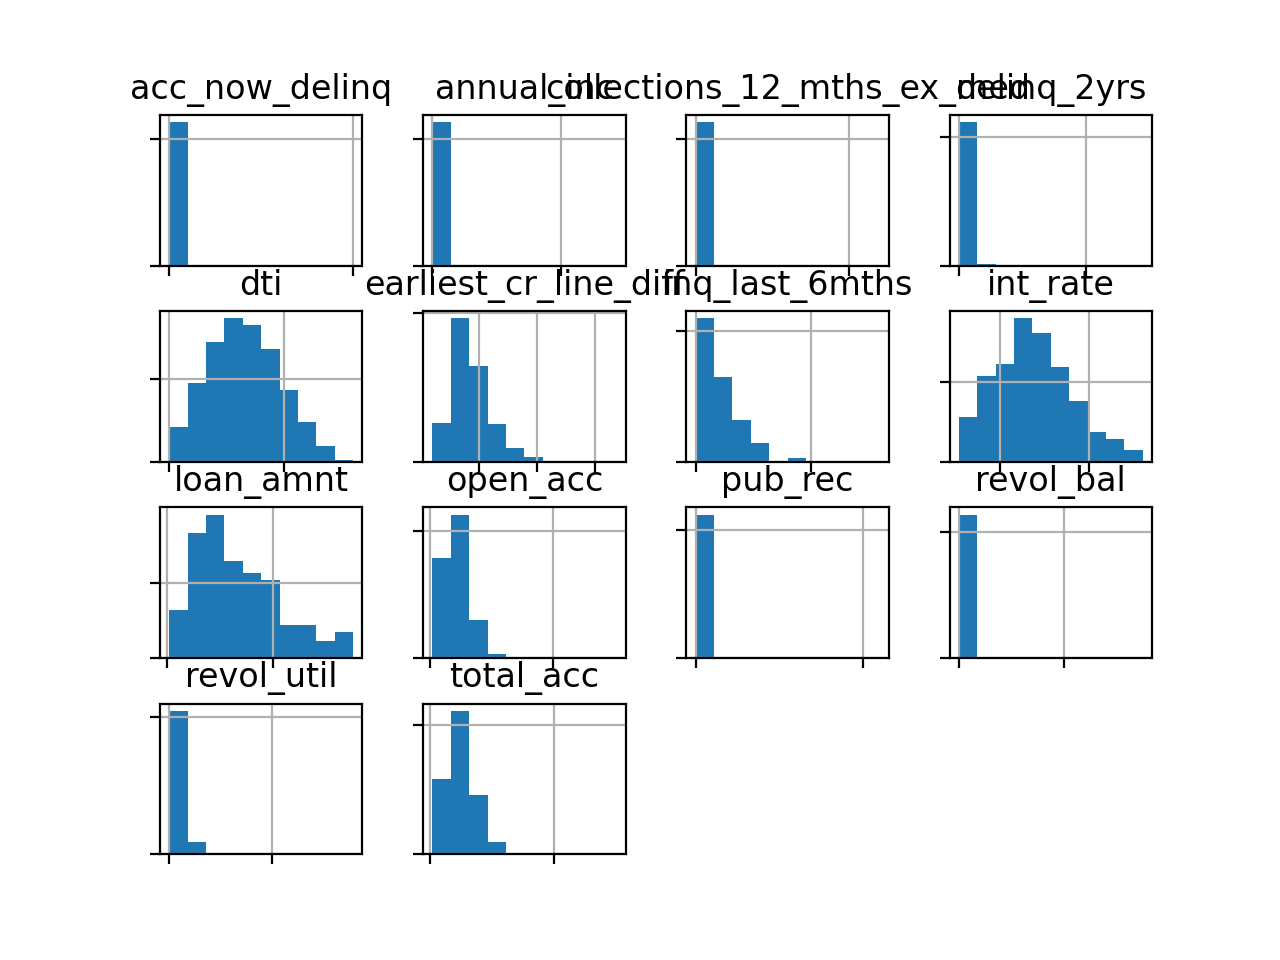

In [26]:
subset = loan_data_preprocessed[['int_rate', 'dti', 'revol_util', 'loan_amnt', 'annual_inc', 'inq_last_6mths',
                   'earliest_cr_line_diff', 'total_acc', 'delinq_2yrs', 'open_acc', 
                   'collections_12_mths_ex_med', 'pub_rec', 'acc_now_delinq', 'revol_bal']]
ax = subset.hist()
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])

In [27]:
plt.hist(loan_data_preprocessed['annual_inc'], bins=500, range=(loan_data_preprocessed['annual_inc'].min(), 8.600000e+04))
loan_data_preprocessed['annual_inc'].describe()

count    2.269720e+05
mean     7.202522e+04
std      5.526165e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.600000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

In [ ]:
plt.figure(figsize=(30,28))
corr = loan_data_preprocessed.corr(method='pearson')
sns.heatmap(corr, annot=True)
plt.show()